In [3]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization

## Data Pre-Processing 

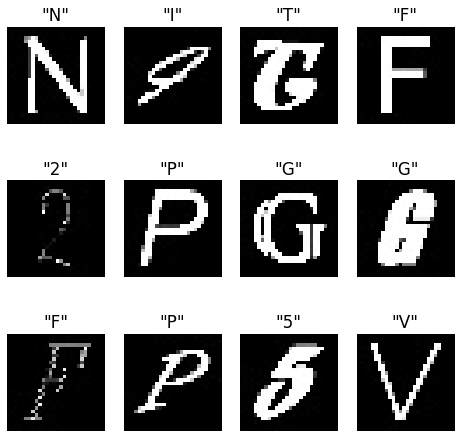

In [4]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [5]:
X=[]
labels =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(X[10000])
print(labels[10000])
print(len(labels))

(28, 28)
784
[[  2.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   3.   0.   0.   2.   1.   0.   2.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   3.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   2.   3.   0.   1.   4.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   5.   0. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 252. 252. 255. 253.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   2.   0.   0. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 254. 255. 255. 255. 253. 255.   2.   3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   4. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 252. 253. 255.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1. 255. 255. 255.  41.   0

In [6]:
#print(X[0])
y = np.array(labels)
#y = y.reshape(y.shape[0],1)
print(y.shape)

(37623,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31979, 28, 28)
(5644, 28, 28)
(31979,)
(5644,)


In [9]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [10]:
'''
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
'''

X_train = X_train
X_test = X_test


num_pixels = 784 #28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)


(31979, 784)
(5644, 784)


In [11]:
model.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.score(X_test, y_test)#how good the model is 

0.885719347980156

In [13]:
#confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[126,   0,   0, ...,   0,   0,   0],
       [  0, 152,   2, ...,   1,   0,   2],
       [  0,   1, 141, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 165,   0,   4],
       [  0,   1,   0, ...,   2, 153,   0],
       [  0,   3,   0, ...,   1,   0, 123]])

In [14]:
print(metrics.classification_report(y_test, y_predicted)) 

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       166
           1       0.87      0.90      0.89       169
           2       0.95      0.95      0.95       148
           3       0.93      0.92      0.92       161
           4       0.91      0.95      0.93       143
           5       0.95      0.90      0.92       167
           6       0.94      0.90      0.92       154
           7       0.96      0.93      0.95       145
           8       0.82      0.88      0.85       158
           9       0.85      0.90      0.87       163
           A       0.90      0.90      0.90       155
           B       0.89      0.86      0.87       162
           C       0.92      0.93      0.92       141
           D       0.93      0.93      0.93       188
           E       0.89      0.88      0.89       154
           F       0.83      0.86      0.85       139
           G       0.90      0.86      0.88       170
           H       0.86    

# Application

In [20]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

In [26]:
from os.path import splitext, basename
from keras.models import model_from_json # importing model
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)
        
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [98]:
def predict_from_model(image, model, labels):
    image = cv2.resize(image, (28,28))
#     image = cv2.cvtColor(image,0)
    print(image.shape)
#     image = np.stack(( image,)*3 , axis =-1)
    
    print("shape:", image.shape)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction

Found 152 images...
Detect 1 plate(s) in IMG_8659
Coordinate of plate(s) in image: 
 [array([[ 79.05708206, 218.87667033, 199.85154219,  60.03195393],
       [ 57.57242576,  71.14754062, 157.53895011, 143.96383525],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
Detect 5 letters...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


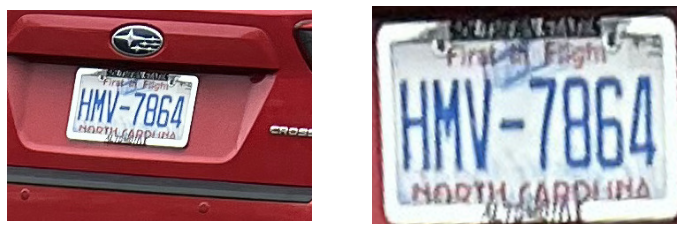

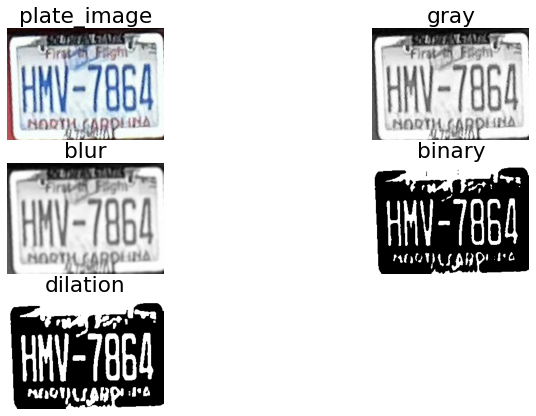

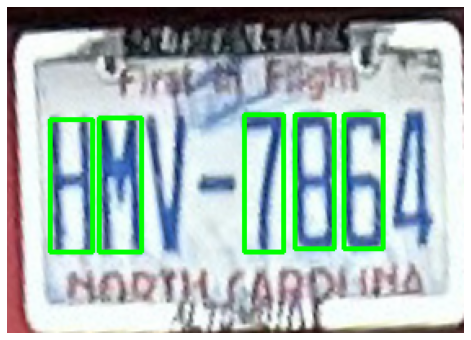

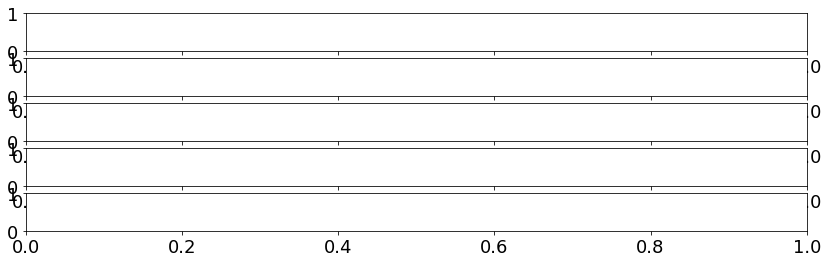

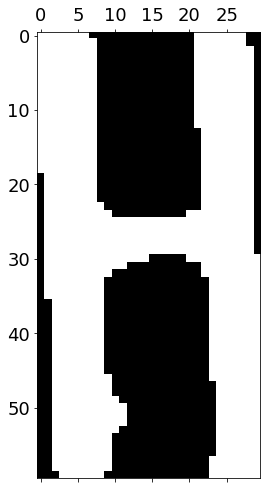

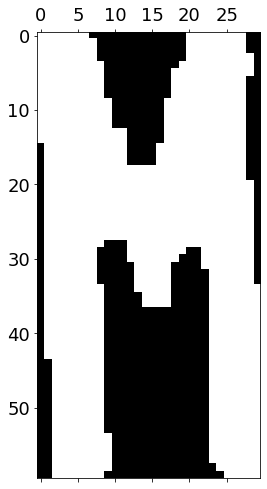

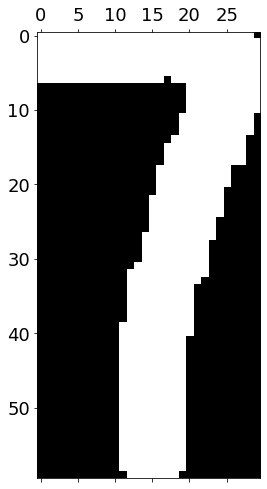

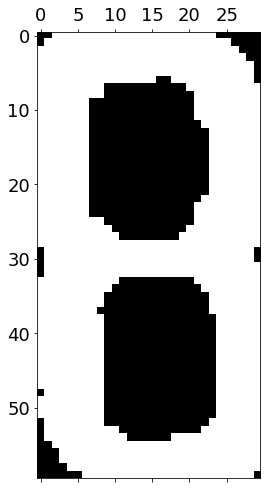

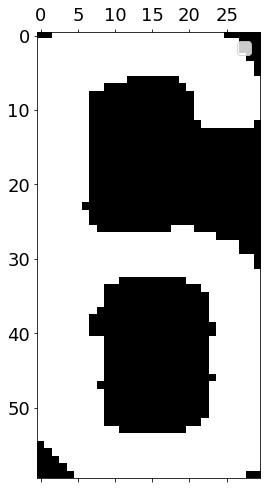

In [99]:
# forward image through model and return plate's image and coordinates
# if error "No Licensese plate is founded!" pop up, try to adjust Dmin

random.seed(14)
image_paths = glob.glob("plates/*.jpg")
from local_utils import *

print("Found %i images..."%(len(image_paths)))

def get_plate(image_path, Dmax=608, Dmin=100):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

# Obtain plate image and its coordinates from an image
# print(image_paths) #grab a random choice from image_paths
test_image_ind = random.randint(0,len(image_paths)-1)
test_image = image_paths[test_image_ind]
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualize our result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

if (len(LpImg)): #check if there is at least one license image
    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    
    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)
    
    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    ## Applied dilation 
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    
# visualize results    
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, blur, binary,thre_mor]
plot_name = ["plate_image","gray","blur","binary","dilation"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.4: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            
print("Detect {} letters...".format(len(crop_characters)))    
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
fig = plt.figure(figsize=(14,4))

if len(crop_characters):
    grid = gridspec.GridSpec(ncols=1,nrows=len(crop_characters),figure=fig)
    for i in range(len(crop_characters)):
        fig.add_subplot(grid[i])
        plt.gray()
#         nparr=np.array(crop_characters[i])
#         print("X:",nparr)
#         print(nparr.shape)
#         nparr= nparr.reshape(nparr.shape[0]*nparr.shape[1],)
#         print("X_2:",nparr[:10])
#         print("Shape:",nparr.shape)
        plt.matshow(crop_characters[i])
#         plt.title(f"img: {i+1}") # adding labels for ease of access
    plt.legend()

In [100]:
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit(y_test)
labels.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

(28, 28)
shape: (28, 28)


ValueError: Found array with dim 3. Estimator expected <= 2.

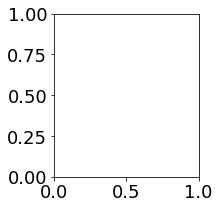

In [101]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i]) # prints the character
    title = np.array2string(predict_from_model(character, model, labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print(final_string)
